In [69]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
#https://www.datatechnotes.com/2024/04/sequence-prediction-with-lstm-model-in.html
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from torch.utils import data

In [71]:
# Convert data into sequence and label with given length
def create_labels(data, step):
    X = np.array([data[i:i+step] for i in range(len(data) - step)])
    y = np.array(data[step:])
    return X, y

In [72]:
from scripts_stock.analysis.fuquan_data.get_data_sql import FGetDataSql 
from scripts_stock.utils.common import CommonScript
conn = CommonScript.connect_to_db("test.db")

In [73]:
# from scripts_stock.analysis.fuquan_data.get_data_sql import FGetDataSql 
# from scripts_stock.utils.common import CommonScript

# step_size = 30
# conn = CommonScript.connect_to_db("test.db")
# stock_index = "601398"
# date_cut = "2022-01-01"
# input_sql_str = FGetDataSql.get_data_sql_str_before_years(stock_index,date_cut)
# df1 = pd.read_sql_query(input_sql_str, conn)
# df1.head(3)
# df = df1[["close"]]


In [74]:
step_size = 10

In [75]:
def get_train_test_data_lstm(df1,df,step_size):
    # Define parameters
    # step_size = 20
    N = df1.shape[0]
    forecast_start = int(df1.shape[0]*0.9)
    # Prepare data for training and testing
    values = df.values
    train, test = values[:forecast_start, :], values[forecast_start:N, :]

    # generate sequence data
    trainX, trainY = create_labels(train, step_size)
    # print(trainX.shape,trainY.shape)
    testX, testY = create_labels(test, step_size)

    # Reshape data for LSTM input
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    return trainX, trainY,testX, testY 

trainX, trainY,testX, testY = get_train_test_data_lstm(df1,df,step_size)

In [76]:
# input_sql_str_v1 = FGetDataSql.get_distinct_stock_index_infuquan()
# stock_list = pd.read_sql_query(input_sql_str_v1, conn)


# train_x_list = []
# train_y_list = []
# i="601398"
# input_sql_str = FGetDataSql.get_data_sql_str_before_years(i,date_cut)
# df1 = pd.read_sql_query(input_sql_str, conn)
# df = df1[["close"]]
# trainX, trainY,testX, testY = get_train_test_data_lstm(df1,df)
# train_x_list.append(trainX)
# train_y_list.append(trainY)

In [77]:
# trainX
# max_values = np.max(trainX, axis=(1, 2), keepdims=True)
# trainX_norm = trainX / max_values

# trainY_norm = trainY/max_values

In [78]:
# trainY_norm

In [79]:
# input_sql_str_v1 = FGetDataSql.get_distinct_stock_index_infuquan()
# stock_list = pd.read_sql_query(input_sql_str_v1, conn)


# train_x_list = []
# train_y_list = []
# test_x_list = []
# test_y_list = []
# for i in stock_list["stock_index"].tolist()[0:30]:
#     input_sql_str = FGetDataSql.get_data_sql_str_before_years(i,date_cut)
#     df1 = pd.read_sql_query(input_sql_str, conn)
#     df = df1[["close"]]
#     trainX, trainY,testX, testY = get_train_test_data_lstm(df1,df)
#     max_values_train = np.max(trainX, axis=(1, 2), keepdims=True)
#     trainX_norm = trainX/max_values_train
#     trainY_norm = trainY/max_values_train.reshape(max_values_train.shape[0],1)
#     train_x_list.append(trainX_norm)
#     train_y_list.append(trainY_norm)
    
#     max_values_test = np.max(testX, axis=(1, 2), keepdims=True)
#     testX_norm = testX/max_values_test
#     testY_norm = testY/max_values_test.reshape(max_values_test.shape[0],1)
#     test_x_list.append(testX_norm)
#     test_y_list.append(testY_norm)

    
# trainX = np.concatenate(train_x_list, axis=0)
# trainY = np.concatenate(train_y_list, axis=0)


# testX_v1 = np.concatenate(test_x_list, axis=0)
# testY_v1 = np.concatenate(test_y_list, axis=0)
# # Convert data to PyTorch tensors
# trainX_tens = torch.tensor(trainX, dtype=torch.float32)
# trainY_tens = torch.tensor(trainY, dtype=torch.float32)
# testX_tens = torch.tensor(testX, dtype=torch.float32)
# testY_tens = torch.tensor(testY, dtype=torch.float32)


# testX_tens_v1 = torch.tensor(testX_v1, dtype=torch.float32)
# testY_tens = torch.tensor(testY_v1, dtype=torch.float32)

# # Create DataLoader for training
# train_dataset = torch.utils.data.TensorDataset(trainX_tens, trainY_tens)
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64)
# print(trainX.shape,trainY.shape)

In [80]:
input_sql_str_v1 = FGetDataSql.get_distinct_stock_index_infuquan()
stock_list = pd.read_sql_query(input_sql_str_v1, conn)


train_x_list = []
train_y_list = []
test_x_list = []
test_y_list = []
for i in stock_list["stock_index"].tolist():
    input_sql_str = FGetDataSql.get_data_sql_str_before_years(i,date_cut)
    df1 = pd.read_sql_query(input_sql_str, conn)
    df = df1[["close"]]
    trainX, trainY,testX, testY = get_train_test_data_lstm(df1,df,step_size)
    max_values_train = np.max(trainX, axis=(1, 2), keepdims=True)
    trainX_norm = trainX/max_values_train
    trainY_norm = trainY/max_values_train.reshape(max_values_train.shape[0],1)
    train_x_list.append(trainX_norm)
    train_y_list.append(trainY_norm)
    
    max_values_test = np.max(testX, axis=(1, 2), keepdims=True)
    testX_norm = testX/max_values_test
    testY_norm = testY/max_values_test.reshape(max_values_test.shape[0],1)
    test_x_list.append(testX_norm)
    test_y_list.append(testY_norm)

    
trainX = np.concatenate(train_x_list, axis=0)
trainY = np.concatenate(train_y_list, axis=0)
trainX_tens = torch.tensor(trainX, dtype=torch.float32)
trainY_tens = torch.tensor(trainY, dtype=torch.float32)

train_dataset = torch.utils.data.TensorDataset(trainX_tens, trainY_tens)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64)

testX_v1 = np.concatenate(test_x_list, axis=0)
testY_v1 = np.concatenate(test_y_list, axis=0)
# Convert data to PyTorch tensors

testX_tens = torch.tensor(testX_norm, dtype=torch.float32)
testY_tens = torch.tensor(testY_norm, dtype=torch.float32)


# testX_tens_v1 = torch.tensor(testX_v1, dtype=torch.float32)
# testY_tens = torch.tensor(testY_v1, dtype=torch.float32)

# Create DataLoader for training
# train_dataset = torch.utils.data.TensorDataset(trainX_tens, trainY_tens)
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64)
print(trainX.shape,trainY.shape)
print(testX_tens.shape,testY_tens.shape)

(146980, 1, 10) (146980, 1)
torch.Size([57, 1, 10]) torch.Size([57, 1])


In [81]:
# aa = trainY/max_values_train.reshape(max_values_train.shape[0],1)
# max_values_train.shape
# trainX_tens

In [82]:
# Define LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Take the last time step's output
        return out

In [83]:
# Hyperparameters
input_size = step_size
hidden_size = 128
output_size = 1
epochs = 100
learning_rate = 0.001
 
# Instantiate LSTM model
model = LSTMModel(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)



In [84]:
# # loss = criterion(output, batch_Y)
# trainX, trainY,testX, testY = get_train_test_data_lstm(df1,df)
# aa=trainY/max_values_train
# aa

In [85]:
# Train the model
for epoch in range(epochs):
#for epoch in range(10):
    model.train()
    for batch_X, batch_Y in train_loader:
        optimizer.zero_grad()  # Clears the gradients of all optimized parameters.
        output = model(batch_X)

        # Computes the loss between the model predictions and the ground
        # truth labels for the current mini-batch.
        loss = criterion(output, batch_Y)

        # Computes gradients of the loss with respect to model parameters.
        loss.backward()

        # Updates model parameters based on the computed gradients using
        # the specified optimization algorithm.
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.0005
Epoch [20/100], Loss: 0.0004


KeyboardInterrupt: 

In [37]:
loss.item()

0.00017398092313669622

In [18]:
# from scripts_stock.cfg.set_dir import ProjectDir
# import os

# model_path = os.path.join(ProjectDir.model_dir,"ts_pred_lstm","lstm_"+str(step_size)+"_test.pth")
# torch.save(model.state_dict(), model_path)


In [23]:
# # Model class must be defined somewhere
# # model = torch.load(model_path)

# model = LSTMModel(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
# model.load_state_dict(torch.load(model_path))
# # model.eval()

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [91]:
error_list = []
for i in range(0,len(test_x_list)):
    testX_tens = torch.tensor(test_x_list[i], dtype=torch.float)
    with torch.no_grad():
        #model.eval()
        testPredict = model(testX_tens)
    error_v1 = np.round(np.average(abs((testPredict.numpy()-test_y_list[i])/test_y_list[i])b),3)
    error_list.append(error_v1)

round(np.average(error_list),3)


# #np.round(abs(np.average(testPredict.numpy()-test_y_list[2])/test_y_list[2])*100,2)
# #test_y_list[2].shape

0.015

In [98]:
i

250

In [97]:
abs((testPredict.numpy()-test_y_list[i])/test_y_list[i])

array([[0.05242017],
       [0.01857017],
       [0.01996175],
       [0.04731249],
       [0.0121405 ],
       [0.01351686],
       [0.00597687],
       [0.00286568],
       [0.00074851],
       [0.00698414],
       [0.00239259],
       [0.04273568],
       [0.02022013],
       [0.02202931],
       [0.02525556],
       [0.04351948],
       [0.01000083],
       [0.05035089],
       [0.02173902],
       [0.01181973],
       [0.00929568],
       [0.03008536],
       [0.02215115],
       [0.00131784],
       [0.01604732],
       [0.01330982],
       [0.0174534 ],
       [0.02173657],
       [0.00299874],
       [0.01080596],
       [0.0052213 ],
       [0.01461394],
       [0.015689  ],
       [0.03389084],
       [0.04090754],
       [0.03073812],
       [0.01301069],
       [0.0052525 ],
       [0.01299378],
       [0.03266457],
       [0.04784481],
       [0.01613368],
       [0.008887  ],
       [0.0115856 ],
       [0.02014578],
       [0.02241827],
       [0.01869092],
       [0.087

In [64]:
len(test_x_list)

251

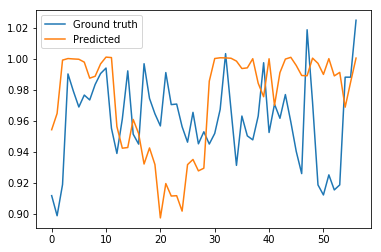

In [101]:
testX_tens = torch.tensor(test_x_list[230], dtype=torch.float)

# Evaluation
with torch.no_grad():
    model.eval()
    testPredict = model(testX_tens)

# Plot results
index = range(len(test_y_list[230]))
plt.plot(index, testY_norm, label="Ground truth")
plt.plot(index, testPredict.numpy(), label="Predicted")
plt.legend()
plt.show()

In [75]:
testX_tens

tensor([[[0.9194, 0.9113, 0.9187,  ..., 0.9335, 0.9416, 0.9335]],

        [[0.9113, 0.9187, 0.9328,  ..., 0.9416, 0.9335, 0.9328]],

        [[0.9187, 0.9328, 0.9194,  ..., 0.9335, 0.9328, 0.9335]],

        ...,

        [[0.9150, 0.9183, 0.9197,  ..., 0.9914, 1.0000, 0.9993]],

        [[0.9177, 0.9190, 0.9277,  ..., 0.9993, 0.9987, 1.0000]],

        [[0.8766, 0.8848, 0.8994,  ..., 0.9525, 0.9538, 1.0000]]])

In [86]:
i = stock_list["stock_index"].tolist()[28]
#for i in stock_list["stock_index"].tolist()[0:30]:
input_sql_str = FGetDataSql.get_data_sql_str_before_years(i,date_cut)
df1 = pd.read_sql_query(input_sql_str, conn)
df = df1[["close"]]
_,_,testX, testY = get_train_test_data_lstm(df1,df,step_size)

In [87]:
testX_tens[1]

tensor([[33.1100, 32.5700, 32.3600, 32.6100, 32.4200, 32.5700, 32.4600, 31.8300,
         31.7500, 31.4500, 31.5500, 31.6500, 31.2600, 31.9500, 31.2900, 30.8800,
         30.7000, 30.9400, 30.2800, 30.3400, 30.0200, 30.2900, 30.6600, 31.2100,
         31.0700, 31.2000, 31.9500, 31.7000, 31.6100, 31.7400]])

In [123]:
model_path = os.path.join(ProjectDir.model_dir,"ts_pred_lstm","lstm_10_error_0.014_test.pth")
model = LSTMModel(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
model.load_state_dict(torch.load(model_path))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [154]:
model_path = os.path.join(ProjectDir.model_dir,"ts_pred_lstm","lstm_10_error_0.014_test.pth")
model = LSTMModel(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
model.load_state_dict(torch.load(model_path))
i="601398"
date_cut = "2024-09-01"
input_sql_str = FGetDataSql.get_data_sql_str_before_years(i,date_cut)
df1 = pd.read_sql_query(input_sql_str, conn)
#test_data = df1.tail(11)
test_data = df1.tail(13).iloc[0:10,:]
testx = np.array(test_data["high"])
testx_v1 = np.array([testx])
testx_v2 = np.reshape(testx_v1, (testx_v1.shape[0], 1, testx_v1.shape[1]))
max_values_X = np.max(testx_v2, axis=(1, 2), keepdims=True)
testx_v3 = testx_v2/max_values_X
testX_tens = torch.tensor(testx_v3, dtype=torch.float32)
with torch.no_grad():
    #model.eval()
    testPredict = model(testX_tens)
print(max_values_X[0][0][0])
print("===== predict =====")
testPredict[0][0]*max_values_X[0][0][0]

5.74
===== predict =====


tensor(5.7075)

In [152]:
df1.tail(12).iloc[0:10,:]

,date,open,close,high,low,stock_index,update_time
5,2024-09-09,5.63,5.61,5.65,5.51,601398,2024-09-27 00:54:44.414351
6,2024-09-10,5.61,5.67,5.72,5.60,601398,2024-09-27 00:54:44.414351
7,2024-09-11,5.66,5.54,5.67,5.50,601398,2024-09-27 00:54:44.414351
8,2024-09-12,5.51,5.54,5.56,5.45,601398,2024-09-27 00:54:44.414351
9,2024-09-13,5.54,5.56,5.58,5.52,601398,2024-09-27 00:54:44.414351
10,2024-09-18,5.57,5.68,5.68,5.57,601398,2024-09-27 00:54:44.414351
11,2024-09-19,5.69,5.65,5.71,5.58,601398,2024-09-27 00:54:44.414351
12,2024-09-20,5.66,5.67,5.69,5.62,601398,2024-09-27 00:54:44.414351
13,2024-09-23,5.66,5.72,5.74,5.62,601398,2024-09-27 00:54:44.414351
14,2024-09-24,5.75,6.00,6.00,5.73,601398,2024-09-27 00:54:44.414351


In [153]:
df1.tail(12)

,date,open,close,high,low,stock_index,update_time
5,2024-09-09,5.63,5.61,5.65,5.51,601398,2024-09-27 00:54:44.414351
6,2024-09-10,5.61,5.67,5.72,5.60,601398,2024-09-27 00:54:44.414351
7,2024-09-11,5.66,5.54,5.67,5.50,601398,2024-09-27 00:54:44.414351
8,2024-09-12,5.51,5.54,5.56,5.45,601398,2024-09-27 00:54:44.414351
9,2024-09-13,5.54,5.56,5.58,5.52,601398,2024-09-27 00:54:44.414351
10,2024-09-18,5.57,5.68,5.68,5.57,601398,2024-09-27 00:54:44.414351
11,2024-09-19,5.69,5.65,5.71,5.58,601398,2024-09-27 00:54:44.414351
12,2024-09-20,5.66,5.67,5.69,5.62,601398,2024-09-27 00:54:44.414351
13,2024-09-23,5.66,5.72,5.74,5.62,601398,2024-09-27 00:54:44.414351
14,2024-09-24,5.75,6.00,6.00,5.73,601398,2024-09-27 00:54:44.414351


In [171]:
model_path = os.path.join(ProjectDir.model_dir,"ts_pred_lstm","lstm_50_error_0.02_test.pth")
model = LSTMModel(input_size=50, hidden_size=hidden_size, output_size=output_size)
model.load_state_dict(torch.load(model_path))
i="601398"
date_cut = "2024-07-01"
input_sql_str = FGetDataSql.get_data_sql_str_before_years(i,date_cut)
df1 = pd.read_sql_query(input_sql_str, conn)
#test_data = df1.tail(50)
test_data = df1.tail(51).iloc[0:50,:]
print(test_data.tail(1))
testx = np.array(test_data["high"])
testx_v1 = np.array([testx])
testx_v2 = np.reshape(testx_v1, (testx_v1.shape[0], 1, testx_v1.shape[1]))
max_values_X = np.max(testx_v2, axis=(1, 2), keepdims=True)
testx_v3 = testx_v2/max_values_X
testX_tens = torch.tensor(testx_v3, dtype=torch.float32)
with torch.no_grad():
    #model.eval()
    testPredict = model(testX_tens)
print(max_values_X[0][0][0])
print("===== predict =====")
testPredict[0][0]*max_values_X[0][0][0]

          date  open  close  high   low  stock_index  \
60  2024-09-25  6.09   6.04  6.22  5.97       601398   

                   update_time  
60  2024-09-27 00:54:44.414351  
6.57
===== predict =====


tensor(6.0911)

In [169]:
df1.tail(10)

,date,open,close,high,low,stock_index,update_time
52,2024-09-11,5.66,5.54,5.67,5.50,601398,2024-09-27 00:54:44.414351
53,2024-09-12,5.51,5.54,5.56,5.45,601398,2024-09-27 00:54:44.414351
54,2024-09-13,5.54,5.56,5.58,5.52,601398,2024-09-27 00:54:44.414351
55,2024-09-18,5.57,5.68,5.68,5.57,601398,2024-09-27 00:54:44.414351
56,2024-09-19,5.69,5.65,5.71,5.58,601398,2024-09-27 00:54:44.414351
57,2024-09-20,5.66,5.67,5.69,5.62,601398,2024-09-27 00:54:44.414351
58,2024-09-23,5.66,5.72,5.74,5.62,601398,2024-09-27 00:54:44.414351
59,2024-09-24,5.75,6.00,6.00,5.73,601398,2024-09-27 00:54:44.414351
60,2024-09-25,6.09,6.04,6.22,5.97,601398,2024-09-27 00:54:44.414351
61,2024-09-26,6.04,6.20,6.21,6.00,601398,2024-09-27 00:54:44.414351


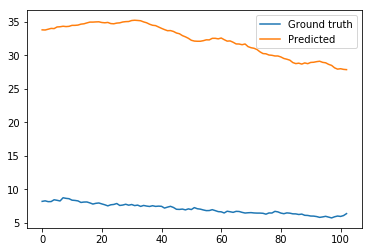

In [91]:
# Evaluation
with torch.no_grad():
    model.eval()
    testPredict = model(testX_tens)

# Plot results
index = range(len(testY))
plt.plot(index, testY, label="Ground truth")
plt.plot(index, testPredict.numpy(), label="Predicted")
plt.legend()
plt.show()